In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel('/content/tweets.xlsx')
df = pd.read_csv('/content/bitcoin.csv')

In [ ]:
data

,Unnamed: 0,Unnamed: 1,date,text,cleanText,Polarity Score,sentiment
0,0,2021-02-11 23:59:04,44237.999352,Blue Ridge Bank shares halted by NYSE after #b...,blue ridge bank shares halted nyse bitcoin atm...,0.00,0
1,1,2021-02-11 23:58:48,44237.999167,"ðŸ˜Ž Today, that's this #Thursday, we will do ...",today thursday take friend leowandersleb btc w...,0.00,0
2,2,2021-02-11 23:54:48,44237.996389,"Guys evening, I have read this article about B...",guys evening read article btc would like share,0.00,0
3,3,2021-02-11 23:54:33,44237.996215,$BTC A big chance in a billion! Price: \487264...,btc big chance billion price bitcoin btc crypto,0.00,0
4,4,2021-02-11 23:54:06,44237.995903,This network is secured by 9 508 nodes as of t...,network secured nodes today soon biggest bears...,-0.25,0
...,...,...,...,...,...,...,...
26201,26201,2021-02-15 23:53:35,44241.995544,More than 200% Profits &amp; 115M$ Volume in $...,profits amp volume sky pump megapump powerful ...,0.30,1
26202,26202,2021-02-15 23:53:29,44241.995475,More than 200% Profits and 115M$ Volume in $SK...,profits volume sky pump megapump powerful pump...,0.30,1
26203,26203,2021-02-15 23:53:10,44241.995255,More than 200% Profits &amp; 115M$ Volume in $...,profits amp volume sky pump megapump powerful ...,0.30,1
26204,26204,2021-02-15 23:53:09,44241.995243,More than 200% Profits &amp; 115M$ Volume in $...,profits amp volume sky pump megapump powerful ...,0.30,1


In [ ]:
data['DateTimeColumn'] = pd.to_datetime(data['Unnamed: 1'])

# Format the date in the desired format
data['Date'] = data['DateTimeColumn'].dt.strftime("%d-%m-%Y")


In [ ]:
df

,Date,Closing Price
0,05-02-2021,37926.51
1,06-02-2021,38023.74
2,07-02-2021,38120.97
3,08-02-2021,38218.20
4,09-02-2021,38315.43
5,10-02-2021,38412.66
6,11-02-2021,38509.89
7,15-02-2021,38900.81
8,16-02-2021,38998.04


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob  # Import TextBlob for sentiment analysis
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# 1. Select relevant columns
data = data[['Date', 'cleanText']]

# 2. Clean the text
data['cleanText'].fillna('', inplace=True)  # Replace NaN with an empty string

# 3. Calculate Polarity Score using TextBlob
data['Polarity Score'] = data['cleanText'].apply(lambda x: TextBlob(x).sentiment.polarity)

data

<ipython-input-7-3349986bd1a1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleanText'].fillna('', inplace=True)  # Replace NaN with an empty string
<ipython-input-7-3349986bd1a1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity Score'] = data['cleanText'].apply(lambda x: TextBlob(x).sentiment.polarity)


,Date,cleanText,Polarity Score
0,11-02-2021,blue ridge bank shares halted nyse bitcoin atm...,0.00
1,11-02-2021,today thursday take friend leowandersleb btc w...,0.00
2,11-02-2021,guys evening read article btc would like share,0.00
3,11-02-2021,btc big chance billion price bitcoin btc crypto,0.00
4,11-02-2021,network secured nodes today soon biggest bears...,-0.25
...,...,...,...
26201,15-02-2021,profits amp volume sky pump megapump powerful ...,0.30
26202,15-02-2021,profits volume sky pump megapump powerful pump...,0.30
26203,15-02-2021,profits amp volume sky pump megapump powerful ...,0.30
26204,15-02-2021,profits amp volume sky pump megapump powerful ...,0.30


In [ ]:
result = data.groupby('Date')['Polarity Score'].sum().reset_index()

# Create a new DataFrame with the result and corresponding dates
a = result.rename(columns={'Polarity Score': 'Sum of Polarity Score'})

# Display the new DataFrame
a

,Date,Sum of Polarity Score
0,06-02-2021,150.741613
1,07-02-2021,293.434627
2,08-02-2021,310.092931
3,09-02-2021,540.900319
4,10-02-2021,428.768825
5,11-02-2021,331.761890
6,15-02-2021,7.407143
7,16-02-2021,731.736755


In [ ]:
# 4. Tokenize the text
max_words = 10000  # Adjust this value based on the size of your dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['cleanText'])

# 5. Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['cleanText'])

# 6. Pad sequences to a fixed length
max_sequence_length = 100  # Adjust this value as needed
X = pad_sequences(sequences, maxlen=max_sequence_length)

# 7. Normalize Polarity Score
scaler = MinMaxScaler()
data['Polarity Score'] = scaler.fit_transform(data['Polarity Score'].values.reshape(-1, 1))



<ipython-input-10-eb33df901019>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Polarity Score'] = scaler.fit_transform(data['Polarity Score'].values.reshape(-1, 1))


In [ ]:
merged_df

,Date,Sum of Polarity Score,Closing Price,Price Difference
0,06-02-2021,0.197886,0.000000,97.23
1,07-02-2021,0.394886,0.099795,97.23
2,08-02-2021,0.417884,0.199589,97.23
3,09-02-2021,0.736534,0.299384,97.23
4,10-02-2021,0.581726,0.399179,97.23
5,11-02-2021,0.447800,0.498974,97.23
6,15-02-2021,0.000000,0.900205,390.92
7,16-02-2021,1.000000,1.000000,97.23


In [ ]:
pip install Augmentor


Epoch 1/50
51/51 [==============================] - 3s 3ms/step - loss: 0.2235
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1208
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1125
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1122
Epoch 5/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1122
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1120
Epoch 7/50
51/51 [==============================] - 0s 6ms/step - loss: 0.1119
Epoch 8/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 9/50
51/51 [==============================] - 0s 5ms/step - loss: 0.1115
Epoch 10/50
51/51 [==============================] - 0s 4ms/step - loss: 0.1112
Epoch 11/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1111
Epoch 12/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1112
Epoch 13/50
51/51 [==============================

7/7 [==============================] - 0s 2ms/step


7/7 [==============================] - 0s 2ms/step
LSTM MSE: 0.04753636538164562, MAE: 0.17748847698805617
GRU MSE: 0.048146038374199285, MAE: 0.17948140844354232
Correlation between Polarity and Closing Price: 0.22229806230395566


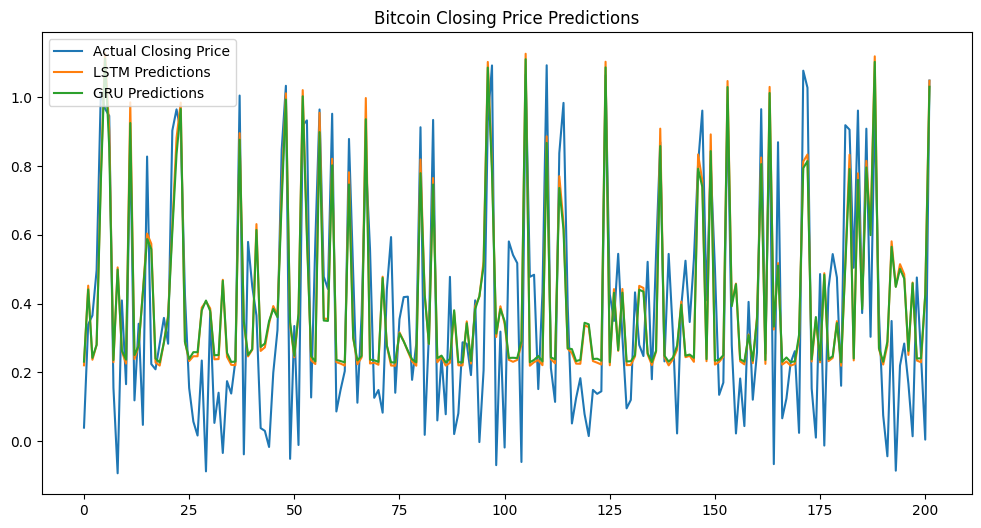

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the provided DataFrame
merged_df = pd.DataFrame({
    "Date": ["06-02-2021", "07-02-2021", "08-02-2021", "09-02-2021", "10-02-2021", "11-02-2021", "15-02-2021", "16-02-2021"],
    "Sum of Polarity Score": [0.197886, 0.394886, 0.417884, 0.736534, 0.581726, 0.447800, 0.000000, 1.000000],
    "Closing Price": [0.000000, 0.099795, 0.199589, 0.299384, 0.399179, 0.498974, 0.900205, 1.000000],
    "Price Difference": [97.23, 97.23, 97.23, 97.23, 97.23, 97.23, 390.92, 97.23]
})

# Define the number of augmented samples to generate
num_augmented_samples = 1000  # Adjust as needed

# Initialize empty lists for augmented data
augmented_polarity = []
augmented_price = []

# Perform data augmentation
for i in range(num_augmented_samples):
    random_idx = np.random.randint(len(merged_df))
    original_polarity = merged_df.iloc[random_idx]["Sum of Polarity Score"]
    original_price = merged_df.iloc[random_idx]["Closing Price"]

    # Simulate a small random change in polarity
    augmented_polarity.append(original_polarity + np.random.uniform(-0.1, 0.1))

    # Simulate a small random change in price
    augmented_price.append(original_price + np.random.uniform(-0.1, 0.1))

# Create a DataFrame from augmented data
augmented_df = pd.DataFrame({
    "Sum of Polarity Score": augmented_polarity,
    "Closing Price": augmented_price
})

# Merge the original and augmented data
merged_df = pd.concat([merged_df, augmented_df], ignore_index=True)

# Normalize data
scaler = MinMaxScaler()
merged_df["Sum of Polarity Score"] = scaler.fit_transform(merged_df["Sum of Polarity Score"].values.reshape(-1, 1))

# Split the data into training and testing sets
X = merged_df["Sum of Polarity Score"].values
y = merged_df["Closing Price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for LSTM and GRU models
X_train = X_train.reshape(-1, 1, 1)
X_test = X_test.reshape(-1, 1, 1)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Build GRU model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(1, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer="adam", loss="mean_squared_error")

# Train LSTM and GRU models
lstm_model.fit(X_train, y_train, epochs=50, batch_size=16)
gru_model.fit(X_train, y_train, epochs=50, batch_size=16)

# Predict using the models
lstm_predictions = lstm_model.predict(X_test)
gru_predictions = gru_model.predict(X_test)

# Evaluate the models
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_mae = mean_absolute_error(y_test, lstm_predictions)

gru_mse = mean_squared_error(y_test, gru_predictions)
gru_mae = mean_absolute_error(y_test, gru_predictions)

# Calculate correlation
correlation, _ = pearsonr(merged_df["Sum of Polarity Score"], merged_df["Closing Price"])

print(f"LSTM MSE: {lstm_mse}, MAE: {lstm_mae}")
print(f"GRU MSE: {gru_mse}, MAE: {gru_mae}")
print(f"Correlation between Polarity and Closing Price: {correlation}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual Closing Price")
plt.plot(lstm_predictions, label="LSTM Predictions")
plt.plot(gru_predictions, label="GRU Predictions")
plt.legend()
plt.title("Bitcoin Closing Price Predictions")
plt.show()
